## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.

new_application_df = application_df.drop(["EIN", "NAME"], axis=1)
new_application_df[:5]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
unique_application = new_application_df.nunique()
print(unique_application)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = new_application_df['APPLICATION_TYPE'].value_counts()



In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 200
application_types_to_replace = application_type_counts[application_type_counts <= cutoff].index.tolist()


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df['CLASSIFICATION'].value_counts()


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
new_classification= classification_counts[classification_counts>1]


In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_cutoff = 1000
classifications_to_replace = classification_counts[classification_counts <= classifications_cutoff].index.tolist()



# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
coverted_df= pd.get_dummies(application_df)


In [10]:
# Split our preprocessed data into our features and target arrays
#from sklearn.model_selection import train_test_split
sample_size = int(len(coverted_df) * 0.5)  # 50% of the original dataset as I run out of RAM
sample_df = coverted_df[:sample_size]


# Split the preprocessed data into features and target arrays
X = sample_df.drop('IS_SUCCESSFUL', axis=1).values
y = sample_df['IS_SUCCESSFUL'].values


# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)



In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=X_train.shape[1]))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1569040   
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,571,501
Trainable params: 1,571,501
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [14]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(8574, 19612)
(8575, 19612)


In [15]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)



Epoch 1/100
268/268 [==============================] - 8s 25ms/step - loss: 0.5418 - accuracy: 0.7259
Epoch 2/100
268/268 [==============================] - 7s 28ms/step - loss: 0.1647 - accuracy: 0.9547
Epoch 3/100
268/268 [==============================] - 6s 24ms/step - loss: 0.0899 - accuracy: 0.9697
Epoch 4/100
268/268 [==============================] - 8s 28ms/step - loss: 0.0822 - accuracy: 0.9700
Epoch 5/100
268/268 [==============================] - 7s 25ms/step - loss: 0.0773 - accuracy: 0.9711
Epoch 6/100
268/268 [==============================] - 7s 27ms/step - loss: 0.0739 - accuracy: 0.9715
Epoch 7/100
268/268 [==============================] - 8s 32ms/step - loss: 0.0711 - accuracy: 0.9713
Epoch 8/100
268/268 [==============================] - 6s 24ms/step - loss: 0.0699 - accuracy: 0.9714
Epoch 9/100
268/268 [==============================] - 7s 28ms/step - loss: 0.0692 - accuracy: 0.9726
Epoch 10/100
268/268 [==============================] - 7s 25ms/step - loss: 0.067

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6735 - accuracy: 0.7005 - 1s/epoch - 5ms/step
Loss: 0.6735178232192993, Accuracy: 0.7005248069763184


<Axes: >

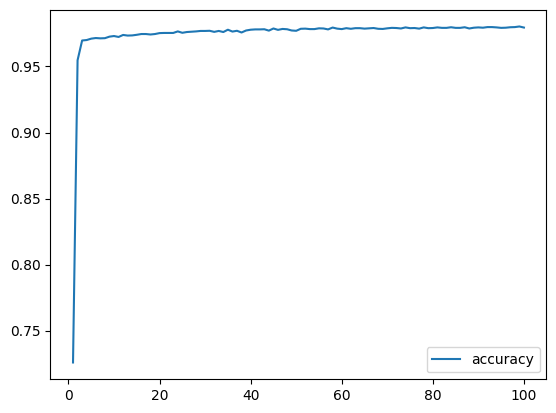

In [17]:
model_history = pd.DataFrame(fit_model.history, index= range(1, len(fit_model.history['loss'])+1 ))
model_history.plot(y = "accuracy")

In [18]:
# Export our model to HDF5 file
nn.save("../AlphabetSoupCharity.h5")
